### FB Prophet
A powerful package by Facebook to perform time series analysis

In [19]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving flights.csv to flights.csv


In [16]:
# Load Our Dataset
df = pd.read_csv("./flights.csv")

In [17]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [8]:
!pip install pandas_profiling

In [9]:
# Quick Profiling
import pandas_profiling as pp

In [10]:

# Generate A Profile Report
pp.ProfileReport(df)

TypeError: ignored

#### Check to See if our dataset is Stationary
1 Visual Plot Test

2 Summary of Stats

3 AD Fuller Test(null)

4 determine the presence of unit root in the series

5 null hypothesis and alternate hypothesis

6 test stats < critical value is stationary

7 KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)

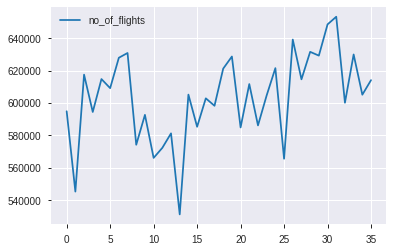

In [20]:
# Plot Test
df.plot()


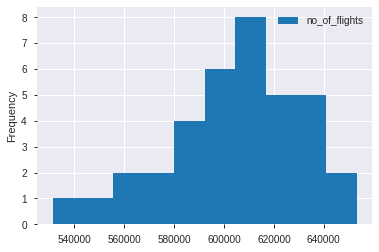

In [21]:
# Histogram
df.plot(kind="hist")

#### Narrative
Not a gaussian bell curve not stationary

### Summary Stats
* Split
* Find mean and variance of each

In [22]:

# Create A Series
X = df['no_of_flights'].values

In [23]:
# Split our dataset
len(X)/2

18.0

In [24]:
X1, X2 = X[0:18], X[18:]

In [25]:
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=591385.1111111111, mean2=616155.6111111111
variance1=667492396.6543211, variance2=485281695.4598766


#### Observation
Not Stationary since the variance are not in the same range

#### Augment Dickey Fuller Test¶


In [26]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
def adf_test(timeseries):
    print ('Results of Aug. Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value {}'.format(key)] = value
    print (df_output)

In [28]:

adf_test(df['no_of_flights'])

Results of Aug. Dickey-Fuller Test:
Test Statistic                 -0.693138
p-value                         0.848519
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value 1%              -3.723863
Critical Value 5%              -2.986489
Critical Value 10%             -2.632800
dtype: float64


### Observation
* Test Stats is -0.69 which is greater than Critical Value at all point hence it is not
* Not Stationary

### How to Make it Stationary
* Difference
* df.diff
* yt = yt -y(t-1)
* df['diff'] = df['a'] - df['a'].shift(1)
### Log Transformation :to stabilize the non consistence values
* using numpy.log()

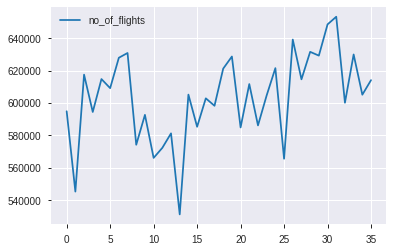

In [29]:
df.plot()

In [30]:
df2 = df

In [31]:
# Reformat
df2.set_index(pd.DatetimeIndex(df2['Dates']))

,Dates,no_of_flights
Dates,,
2005-01-01,2005-01-01,594924
2005-02-01,2005-02-01,545332
2005-03-01,2005-03-01,617540
2005-04-01,2005-04-01,594492
2005-05-01,2005-05-01,614802
2005-06-01,2005-06-01,609195
2005-07-01,2005-07-01,627961
2005-08-01,2005-08-01,630904
2005-09-01,2005-09-01,574253


In [32]:
df2 = df2.drop('Dates',axis=1)

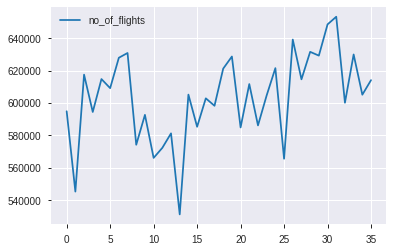

In [33]:
df2.plot()

### Method 1 :Differencing To Fix Non Stationary Dataset

In [34]:
# Differencing To Fix Non Stationary Dataset
df2['no_of_flights'] = df2['no_of_flights'] - df2['no_of_flights'].shift(1)

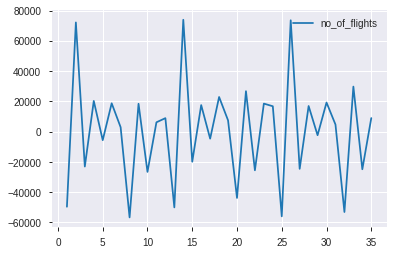

In [35]:
df2.plot()

In [36]:
### Using Pandas Diff on Dataset with DatetimeIndex
df_diff = df2.diff(periods=1)

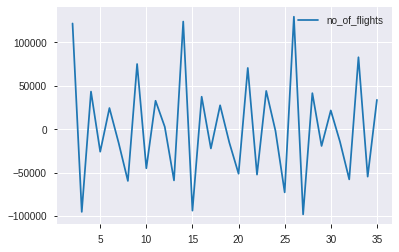

In [37]:
df_diff.plot()

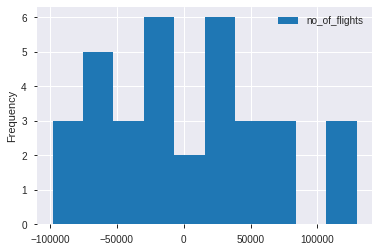

In [38]:
df_diff.plot(kind='hist')

#### Observation
Our Dataset is now stationary

### Decompose our Dataset
To Find Trends,Seasonality

In [39]:
# Load Stats Pkgs
import statsmodels.api as sm

In [40]:
df_n = pd.read_csv('flights.csv',parse_dates=['Dates'],index_col='Dates')

In [41]:
df_n.head()

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802


In [42]:
# Makes it Easier to Manipulate by Time/Date
df_n['2005']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


In [43]:

# We Can select by range of years
df_n['2005':'2006']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


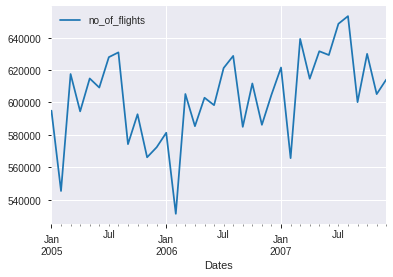

In [44]:
# Plot it
df_n.plot()

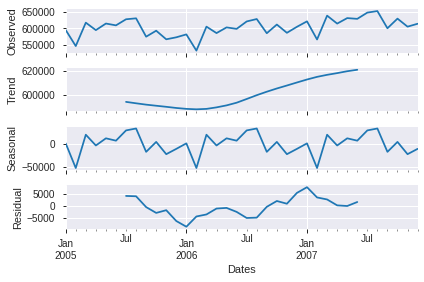

In [45]:
#### Decomposition Plot
decomposition = sm.tsa.seasonal_decompose(df_n, model='additive')
fig = decomposition.plot()

### Using Facebook Prophet
* Steps
* Initialize Model :: Prophet()
* Set columns as ds,y
* Fit dataset :: Prophet().fit()
* Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
* Predict :: Prophet().predict(future_dates)
* Plot :: Prophet().plot(predictions)

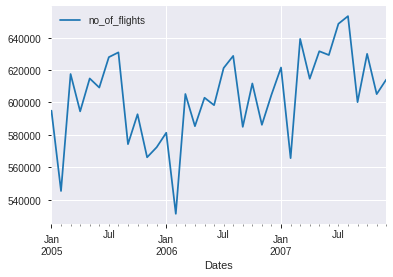

In [46]:
# Plot
df_n.plot()

In [47]:

# Make it stationary
sdf = df_n.diff(periods=1)

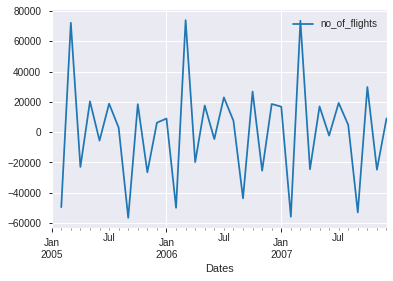

In [48]:

sdf.plot()

### Building Model

In [49]:
sdf.dtypes

no_of_flights    float64
dtype: object

In [50]:
# load Timeseries Pkgs
from fbprophet import Prophet

#### Parameters
* growth: linear/logistic
* seasonality:additive/multiplicative
* holidays:
* changepoint:

In [51]:
# Initialize the Model
m = Prophet()

In [52]:
# Make the index as ds
sdf['ds'] = sdf.index

In [53]:
sdf.columns

Index(['no_of_flights', 'ds'], dtype='object')

In [54]:
# Works with a ds and y column names
sdf.rename(columns={'ds':'ds','no_of_flights':'y'},inplace=True)

In [55]:
new_df = sdf[['ds','y']]


In [72]:
new_df

,ds,y
Dates,,
2005-01-01,2005-01-01,NaN
2005-02-01,2005-02-01,-49592.0
2005-03-01,2005-03-01,72208.0
2005-04-01,2005-04-01,-23048.0
2005-05-01,2005-05-01,20310.0
2005-06-01,2005-06-01,-5607.0
2005-07-01,2005-07-01,18766.0
2005-08-01,2005-08-01,2943.0
2005-09-01,2005-09-01,-56651.0


In [56]:
new_df.head()


,ds,y
Dates,,
2005-01-01,2005-01-01,NaN
2005-02-01,2005-02-01,-49592.0
2005-03-01,2005-03-01,72208.0
2005-04-01,2005-04-01,-23048.0
2005-05-01,2005-05-01,20310.0


In [57]:
# Fit our Mode to our Data
m.fit(new_df,algorithm='Newton')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
# Create Future Dates of 360 days
future_dates = m.make_future_dataframe(periods=365)

In [59]:
# Make Prediction with our Model
prediction = m.predict(future_dates)

In [60]:
prediction.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,-2711.794477,244.461402,7396.418953,-2711.794477,-2711.794477,6767.602439,6767.602439,6767.602439,6767.602439,6767.602439,6767.602439,0.0,0.0,0.0,4055.807963
1,2005-02-01,-2571.714150,-52804.782239,-46180.743906,-2571.714150,-2571.714150,-46882.135892,-46882.135892,-46882.135892,-46882.135892,-46882.135892,-46882.135892,0.0,0.0,0.0,-49453.850042
2,2005-03-01,-2445.189984,67383.007010,74071.556418,-2445.189984,-2445.189984,73145.012893,73145.012893,73145.012893,73145.012893,73145.012893,73145.012893,0.0,0.0,0.0,70699.822909
3,2005-04-01,-2305.109659,-27372.518813,-20586.933590,-2305.109659,-2305.109659,-21686.914067,-21686.914067,-21686.914067,-21686.914067,-21686.914067,-21686.914067,0.0,0.0,0.0,-23992.023726
4,2005-05-01,-2169.548053,14495.016517,21107.160885,-2169.548053,-2169.548053,19993.464270,19993.464270,19993.464270,19993.464270,19993.464270,19993.464270,0.0,0.0,0.0,17823.916217


**Observation**
* **yhat** : the predicted forecast
* **yhat_lower** : the lower border of the prediction
* **yhat_upper**: the upper border of the prediction


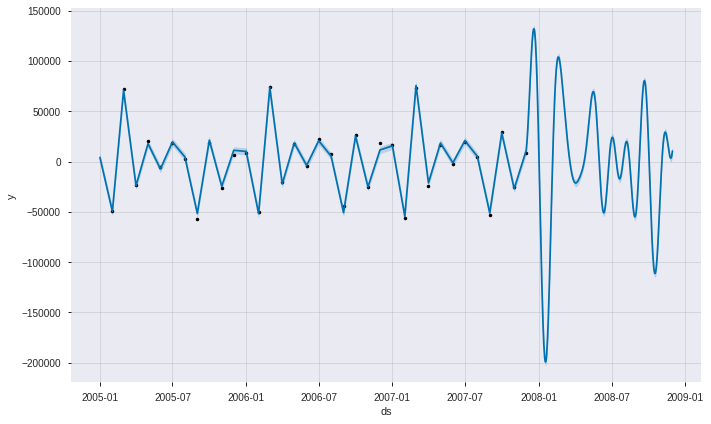

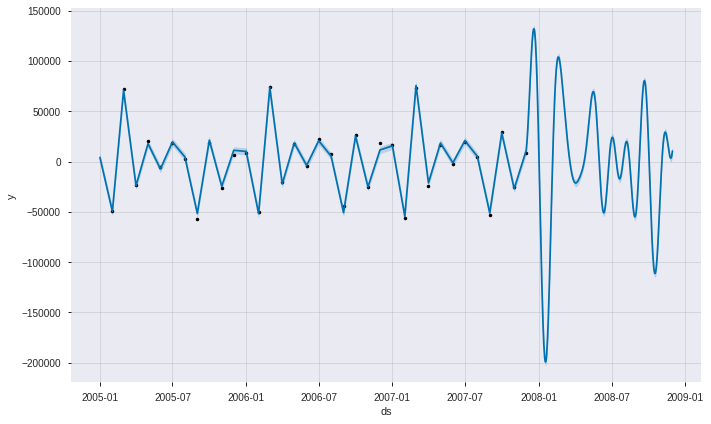

In [61]:
# Plot Our Predictions
m.plot(prediction)

###  Result
A Trending data

Black dots : the actual data points in our dataset.

Deep blue line : the predicted forecast/the predicted values

Light blue line : the boundaries

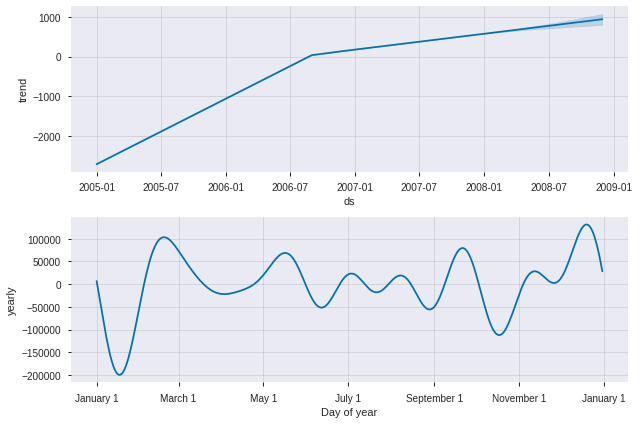

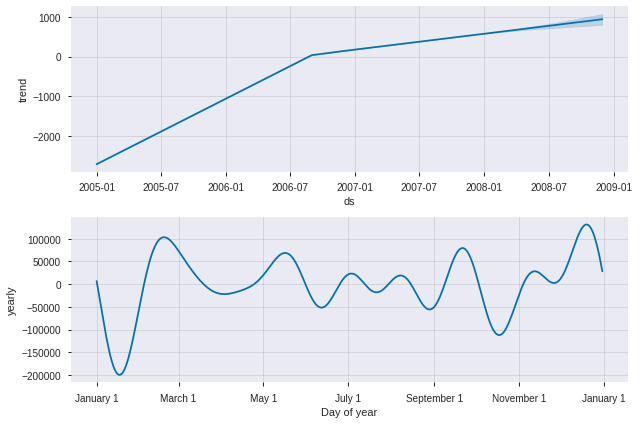

In [63]:

# Visualize Each Component [Trends,Weekly]
m.plot_components(prediction)

**Cross Validation**

For measuring forecast error by comparing the predicted values with the actual values

**initial**:the size of the initial training period

**period** : the spacing between cutoff dates

**horizon** : the forecast horizon

In [64]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [65]:
new_df.shape


(36, 2)

In [66]:
cv = cross_validation(m,initial='36 days',period='180 days',horizon="365 days")


INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [68]:

cv = cross_validation(m,initial='36 days',period='180 days',horizon="365 days")


INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [69]:
# View CV Data
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,132382.788801,132382.788706,132382.788905,18766.0,2005-06-09
1,2005-08-01,-319924.148158,-319924.148544,-319924.147771,2943.0,2005-06-09
2,2005-09-01,109440.248487,109440.247688,109440.249297,-56651.0,2005-06-09
3,2005-10-01,300035.317030,300035.315807,300035.318284,18459.0,2005-06-09
4,2005-11-01,98862.531051,98862.529344,98862.532812,-26574.0,2005-06-09


In [70]:
### Performance Metrics
from fbprophet.diagnostics import performance_metrics
df_perf = performance_metrics(cv)
df_perf.head()



,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,5.164322e+09,71863.213878,56431.774454,4.254110,3.406143,0.0
1,53 days,2.799793e+10,167325.809947,108744.364293,30.167214,5.191032,0.0
2,57 days,2.639988e+10,162480.392544,95198.623099,27.920522,0.697647,0.0
3,58 days,2.644925e+10,162632.261740,96711.029403,28.421493,1.670879,0.0
4,62 days,2.652185e+10,162855.292857,98845.786752,28.327063,1.610636,0.0


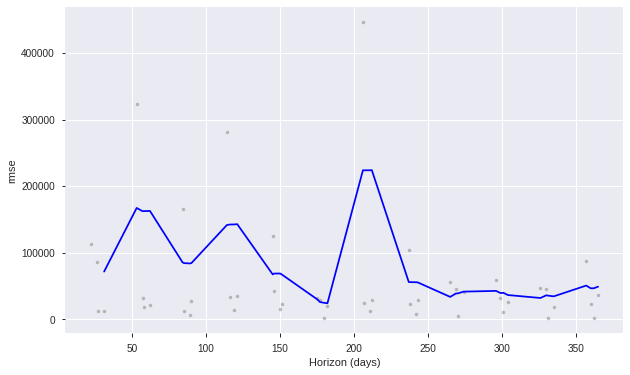

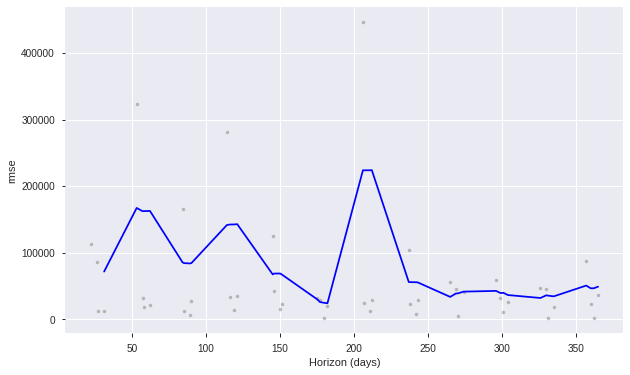

In [71]:
### Visualizing Performance Metrics
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

